# Set up notebook

In [1]:
import numpy as np
import pandas as pd
import flask
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, decomposition
from sklearn import metrics, model_selection
import xgboost

In [2]:
plt.style.use("fivethirtyeight")

In [43]:
plt.rcParams["figure.figsize"]=[5.0, 3.0]

# Load user info

In [4]:
with open("airbnb_session_data.txt", "r") as f:
    data = [i.strip().split("|") for i in f.readlines()]

In [5]:
df = pd.DataFrame(data[1:], columns=data[0])

In [6]:
df.head()

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,...,next_id_session,next_dim_session_number,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,...,b812bf56bf89b0b31f4e5b50d0c15ff8,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,...,456083b5f5506ad125d595006819de1d,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,...,94d30e9f3c8f92ae691e49d77a884777,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,...,ab02139dc81bea4b126cf5043faf53d9,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,...,6a69db1a5876e9798947f20e2c52bcc8,88,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 22:21:58,2015-02-19 22:22:02,0,0,0


In [7]:
df.shape

(7756, 21)

In [8]:
df.columns

Index([u'id_visitor', u'id_session', u'dim_session_number', u'dim_user_agent',
       u'dim_device_app_combo', u'ds', u'ts_min', u'ts_max', u'did_search',
       u'sent_message', u'sent_booking_request', u'next_id_session',
       u'next_dim_session_number', u'next_dim_user_agent',
       u'next_dim_device_app_combo', u'next_ds', u'next_ts_min',
       u'next_ts_max', u'next_did_search', u'next_sent_message',
       u'next_sent_booking_request'],
      dtype='object')

In [46]:
unique_items = []
for i in df.columns:
    unique_items.append([i, df[i].nunique()])
unique_items = pd.DataFrame(unique_items, 
                            columns=["column", "num_unique"])

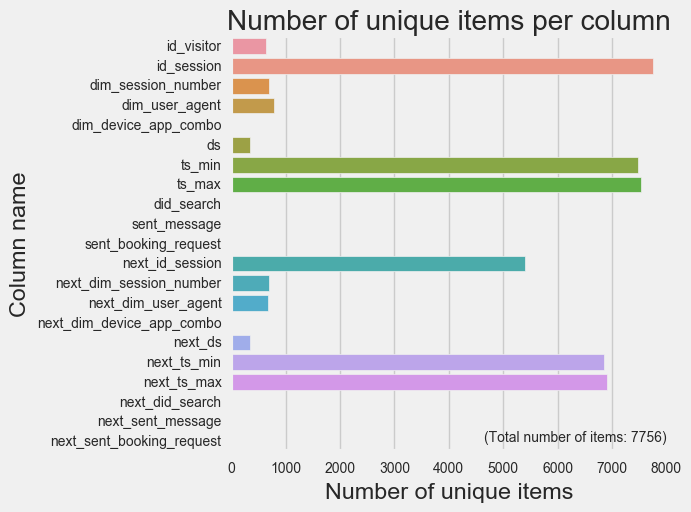

In [59]:
plt.subplots(figsize=(5,5));
sns.barplot(y="column", x="num_unique", data=unique_items, 
            orient="h");
plt.text(8000,20, "(Total number of items: {})".format(df.shape[0]), 
         fontsize=10, ha="right")
plt.title("Number of unique items per column");
plt.xlabel("Number of unique items");
plt.ylabel("Column name");
plt.show();